In [1]:
from environment import truly_dynamic_environment, replay, visualize
from agent_heuristic_owen import heurisitic_agent
from agent_ab_owen import alpha_beta_agent
from agent_pmcs_owen import PMCSAgent
import numpy as np


# examples as class
class RandomAgent1:
    def agent_function(board, player): 
        """A random agent."""
        return np.random.choice(np.where(board[0]==0)[0])

# example as function
def random_agent2(board, player): 
    """Another random agent."""
    return np.random.choice(np.where(board[0]==0)[0])

pmcs_agent = PMCSAgent(inc=2000)

players = [
    {
        "algo": heurisitic_agent,
        "name": "heurisitic_agent1",
        "player": +1,
        "args": {"cutoff": 8}
    },
    {
        "algo": pmcs_agent.act,
        "name": "pmcs_agent",
        "player": -1,
        "args": {}
    }
]

Run the game

heurisitic_agent1 took a total of 174.75 seconds
pmcs_agent took a total of 145.259 seconds
The winner is pmcs_agent (-1)
Turns Taken: 40


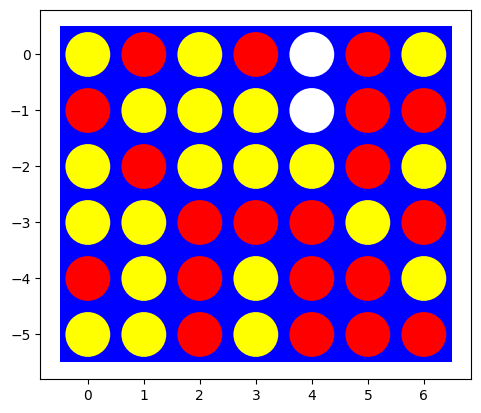

defaultdict(int, {'pmcs_agent': 4, 'heurisitic_agent1': 1})

In [2]:
from collections import defaultdict
runs = []
winner = defaultdict(int)
for _ in range(5):
    result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)
    runs.append((result,final_board,all_boards))
    visualize(final_board)
    if result['winner'] == 1: 
        winner[players[0]['name']] += 1
    elif result['winner'] == -1:
        winner[players[1]['name']] += 1
    else:
        winner["draw"] += 1
    players[0], players[1] = players[1], players[0]
    
winner

In [12]:
res = 0
for run in runs:
    if list(run[0]["algo_info"].keys())[0] == "pmcs_agent" and run[0]['winner'] == 1:
        res += 1
    if list(run[0]["algo_info"].keys())[1] == "pmcs_agent" and run[0]['winner'] == -11:
        res += 1
res

2

heurisitic_agent1 took a total of 10.515 seconds
pmcs_agent took a total of 4.898 seconds
The winner is pmcs_agent (-1)
Turns Taken: 20


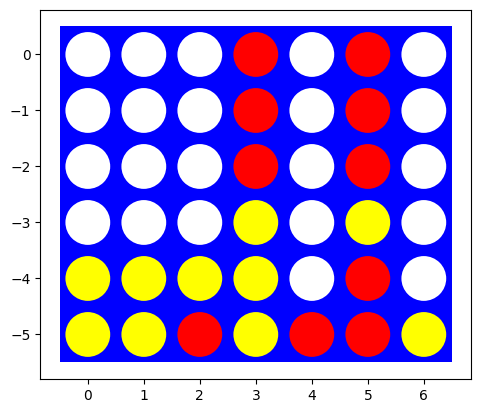

In [ ]:
result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)

visualize(final_board)

Slow replay

In [7]:
runs[0][0]

{'algo_info': {'heurisitic_agent1': {'time': [685.4173999745399,
    317.4585999804549,
    440.8759999787435,
    937.8848999622278,
    371.27659999532625,
    4251.0454000439495,
    2724.2492999648675,
    897.8534999769181,
    1094.6798999793828,
    440.64019998768345]},
  'pmcs_agent': {'time': [1774.3737999699079,
    2031.609199999366,
    1567.5521999946795,
    1345.1643000007607,
    1638.8669000007212,
    1120.0207999791019,
    1169.7831000201404,
    1062.381500029005,
    788.6710000457242,
    473.7478999886662]}},
 'winner': -1,
 'turns_taken': 20}

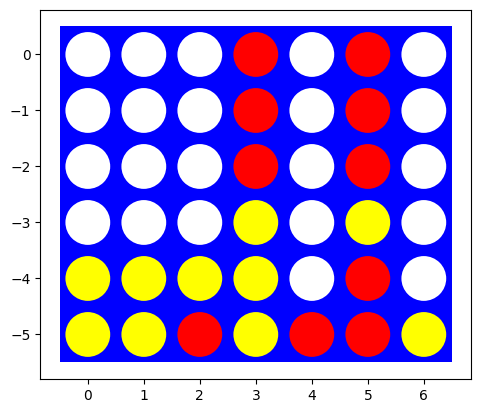

In [8]:
replay(runs[0][2])